## 1. Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn import preprocessing

In [2]:
train = pd.read_csv("./dataset/train.csv")
test = pd.read_csv("./dataset/test.csv")

## 2. EDA

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.shape

(1460, 81)

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

<AxesSubplot:>

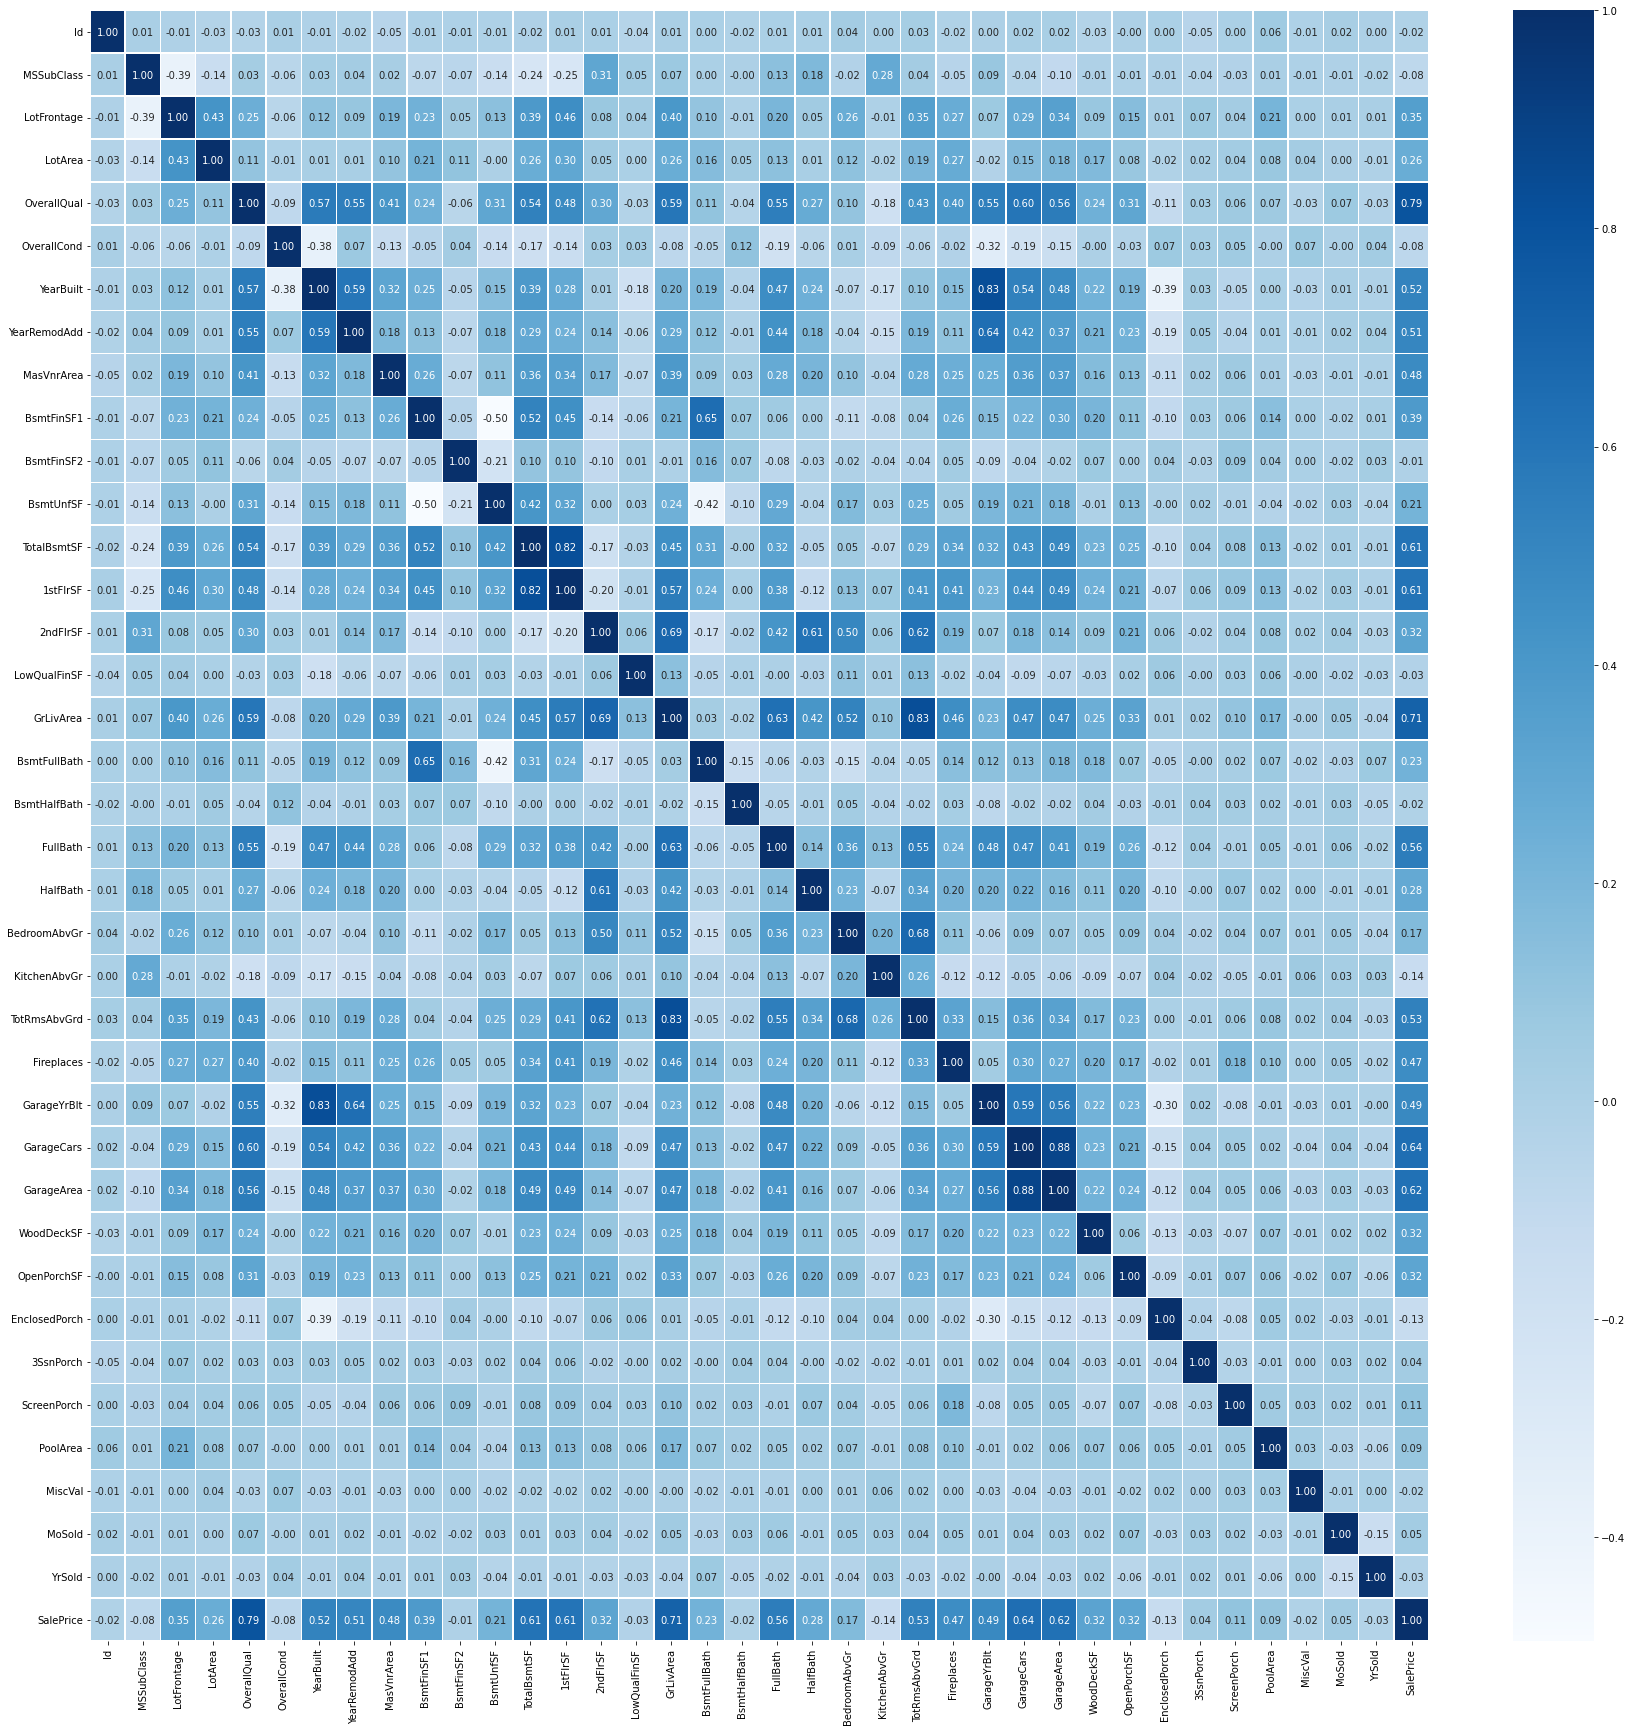

In [11]:
plt.figure(figsize=(30,30))
sb.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

* Save
  - LotFrontage
  - LotArea(0.26)
  - OverallQual
  - YearBuilt
  - YearRemodAdd
  - MasVnrArea
  - BsmFinSF1
  - BsmtUnfSF(0.21)
  - TotalBsmtSF
  - 1stFlrSF
  - 2ndFlrSF
  - GrLivArea
  - BsmtFullBath(0.23)
  - FullBath
  - HalfBath(0.28)
  - TotRmsAbvGrd
  - Fireplaces
  - GarageYrBlt
  - GarageCars
  - GarageArea
  - WoodDeckSF
  - OpenPorchSF

## 3. Data Preprocessing

### 3.1 Correlation

In [12]:
corr_drop = ['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']
train = train.drop(corr_drop, axis=1)
test = test.drop(corr_drop, axis=1)

### 3.2 NaN value

In [13]:
null_drop = ['Alley', 'Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu']
train = train.drop(null_drop, axis=1)
test = test.drop(null_drop, axis=1)

In [14]:
train["LotFrontage"].fillna(train["LotFrontage"].mean(), inplace=True)
test["LotFrontage"].fillna(train["LotFrontage"].mean(), inplace=True)

In [15]:
mas_type = train[train["MasVnrType"].isnull()].index.tolist()
mas_area = train[train["MasVnrArea"].isnull()].index.tolist()
print(mas_type)
print(mas_area)

[234, 529, 650, 936, 973, 977, 1243, 1278]
[234, 529, 650, 936, 973, 977, 1243, 1278]


In [16]:
test_mas_type = test[test["MasVnrType"].isnull()].index.tolist()
test_mas_area = test[test["MasVnrArea"].isnull()].index.tolist()
print(test_mas_type)
print(test_mas_area)

[231, 246, 422, 532, 544, 581, 851, 865, 880, 889, 908, 1132, 1150, 1197, 1226, 1402]
[231, 246, 422, 532, 544, 581, 851, 865, 880, 889, 908, 1132, 1197, 1226, 1402]


In [17]:
train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='MasVnrType', ylabel='MasVnrArea'>

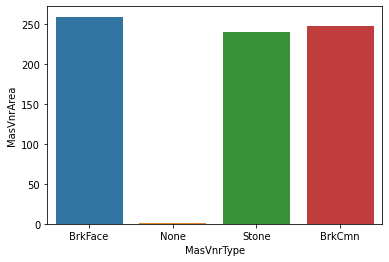

In [18]:
sb.barplot(x="MasVnrType", y="MasVnrArea", ci=None, data=train)

In [19]:
test["MasVnrArea"][1150]

198.0

In [20]:
test["MasVnrType"][1150] = "BrkFace"

In [21]:
test_mas_type = test[test["MasVnrType"].isnull()].index.tolist()
test_mas_area = test[test["MasVnrArea"].isnull()].index.tolist()
print(test_mas_type)
print(test_mas_area)

[231, 246, 422, 532, 544, 581, 851, 865, 880, 889, 908, 1132, 1197, 1226, 1402]
[231, 246, 422, 532, 544, 581, 851, 865, 880, 889, 908, 1132, 1197, 1226, 1402]


In [22]:
train["MasVnrType"].fillna(train["MasVnrType"].mode()[0], inplace=True)
test["MasVnrType"].fillna(train["MasVnrType"].mode()[0], inplace=True)
train["MasVnrArea"].fillna(0, inplace=True)
test["MasVnrArea"].fillna(0, inplace=True)

In [23]:
qual = train[train["BsmtQual"].isnull()].index.tolist()
cond = train[train["BsmtCond"].isnull()].index.tolist()
ex = train[train["BsmtExposure"].isnull()].index.tolist()
t1 = train[train["BsmtFinType1"].isnull()].index.tolist()
t2 = train[train["BsmtFinType2"].isnull()].index.tolist()
print(qual)
print(cond)
print(ex)
print(t1)
print(t2)

[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 948, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
[17, 39, 90, 102, 156, 182, 259, 332, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]


In [24]:
qual_null = []
for q in qual:
    if q not in cond or q not in ex or q not in t1 or q not in t2:
        qual_null.append(q)

cond_null = []
for c in cond:
    if c not in qual or c not in ex or c not in t1 or c not in t2:
        cond_null.append(c)

ex_null = []
for e in ex:
    if e not in qual or e not in cond or e not in t1 or e not in t2:
        ex_null.append(e)

t1_null = []
for t_1 in t1:
    if t_1 not in qual or t_1 not in cond or t_1 not in ex or t_1 not in t2:
        t1_null.append(t_1)

t2_null = []
for t_2 in t2:
    if t_2 not in qual or t_2 not in cond or t_2 not in ex or t_2 not in t1:
        t2_null.append(t_2)

print(qual_null)
print(cond_null)
print(ex_null)
print(t1_null)
print(t2_null)

[]
[]
[948]
[]
[332]


In [25]:
print(train["BsmtQual"][948], train["BsmtCond"][948])

Gd TA


In [26]:
print(train[train["BsmtQual"] == 'Gd']["BsmtExposure"].value_counts())
print(train[train["BsmtCond"] == 'TA']["BsmtExposure"].value_counts())

No    359
Av    135
Gd     69
Mn     54
Name: BsmtExposure, dtype: int64
No    877
Av    207
Gd    122
Mn    104
Name: BsmtExposure, dtype: int64


In [27]:
train["BsmtExposure"][948] = "No"

In [28]:
print(train["BsmtQual"][332])
print(train["BsmtCond"][332])

Gd
TA


In [29]:
print(train[train["BsmtCond"] == 'Gd']["BsmtFinType2"].value_counts())
print(train[train["BsmtCond"] == 'TA']["BsmtFinType2"].value_counts())

Unf    50
ALQ     5
BLQ     3
Rec     3
LwQ     3
GLQ     1
Name: BsmtFinType2, dtype: int64
Unf    1161
Rec      50
LwQ      42
BLQ      30
ALQ      14
GLQ      13
Name: BsmtFinType2, dtype: int64


In [30]:
train["BsmtFinType2"][332] = 'Unf'

In [31]:
train["BsmtQual"].fillna("X", inplace=True)
train["BsmtCond"].fillna("X", inplace=True)
train["BsmtExposure"].fillna("X", inplace=True)
train["BsmtFinType1"].fillna("X", inplace=True)
train["BsmtFinType2"].fillna("X", inplace=True)

In [32]:
qual = test[test["BsmtQual"].isnull()].index.tolist()
cond = test[test["BsmtCond"].isnull()].index.tolist()
ex = test[test["BsmtExposure"].isnull()].index.tolist()
sf1 = test[test["BsmtFinType1"].isnull()].index.tolist()
sf2 = test[test["BsmtFinType2"].isnull()].index.tolist()
print(qual)
print(cond)
print(ex)
print(sf1)
print(sf2)

[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 757, 758, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 580, 590, 606, 608, 660, 662, 725, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1064, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[27, 125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 888, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 

In [33]:
qual_fix = []
for q in qual:
    if q not in cond or q not in ex or q not in sf1 or q not in sf2:
        qual_fix.append(q)

cond_fix = []
for c in cond:
    if c not in qual or c not in ex or c not in sf1 or c not in sf2:
        cond_fix.append(c)

ex_fix = []
for e in ex:
    if e not in qual or e not in cond or e not in sf1 or e not in sf2:
        ex_fix.append(e)

sf1_fix = []
for s in sf1:
    if s not in qual or s not in cond or s not in ex or s not in sf2:
        sf1_fix.append(s)

sf2_fix = []
for s2 in sf2:
    if s2 not in qual or s2 not in cond or s2 not in ex or s2 not in sf1:
        sf2_fix.append(s2)
print(qual_fix)
print(cond_fix)
print(ex_fix)
print(sf1_fix)
print(sf2_fix)

[757, 758]
[580, 725, 1064]
[27, 888]
[]
[]


In [34]:
print(test["BsmtCond"][757])
print(test["BsmtExposure"][757])

Fa
No


In [35]:
print(train[train["BsmtCond"] == "Fa"]["BsmtQual"].value_counts())
print(train[train["BsmtExposure"] == "No"]["BsmtQual"].value_counts())

TA    35
Fa     8
Gd     2
Name: BsmtQual, dtype: int64
TA    522
Gd    360
Ex     43
Fa     29
Name: BsmtQual, dtype: int64


In [36]:
test["BsmtQual"][757] = "TA"

In [37]:
print(test["BsmtCond"][758])
print(test["BsmtExposure"][758])

TA
No


In [38]:
print(train[train["BsmtCond"] == "TA"]["BsmtQual"].value_counts())
print(train[train["BsmtExposure"] == "No"]["BsmtQual"].value_counts())

TA    596
Gd    580
Ex    110
Fa     25
Name: BsmtQual, dtype: int64
TA    522
Gd    360
Ex     43
Fa     29
Name: BsmtQual, dtype: int64


In [39]:
test["BsmtQual"][758] = "TA"

In [40]:
print(test["BsmtQual"][580])
print(test["BsmtExposure"][580])

Gd
Mn


In [41]:
print(train[train["BsmtQual"] == "Gd"]["BsmtCond"].value_counts())
print(train[train["BsmtExposure"] == "Mn"]["BsmtCond"].value_counts())

TA    580
Gd     36
Fa      2
Name: BsmtCond, dtype: int64
TA    104
Fa      5
Gd      5
Name: BsmtCond, dtype: int64


In [42]:
test["BsmtCond"][580] = "TA"

In [43]:
print(test["BsmtQual"][725])
print(test["BsmtExposure"][725])

TA
No


In [44]:
print(train[train["BsmtQual"] == "TA"]["BsmtCond"].value_counts())
print(train[train["BsmtExposure"] == "No"]["BsmtCond"].value_counts())

TA    596
Fa     35
Gd     18
Name: BsmtCond, dtype: int64
TA    878
Fa     39
Gd     36
Po      1
Name: BsmtCond, dtype: int64


In [45]:
test["BsmtCond"][725] = "TA"

In [46]:
print(test["BsmtQual"][1064])
print(test["BsmtExposure"][1064])

TA
Av


In [47]:
print(train[train["BsmtQual"] == "TA"]["BsmtCond"].value_counts())
print(train[train["BsmtExposure"] == "Av"]["BsmtCond"].value_counts())

TA    596
Fa     35
Gd     18
Name: BsmtCond, dtype: int64
TA    207
Gd     14
Name: BsmtCond, dtype: int64


In [48]:
test["BsmtCond"][1064] = "TA"

In [49]:
print(test["BsmtQual"][27])
print(test["BsmtCond"][27])

Gd
TA


In [50]:
print(train[train["BsmtQual"] == "Gd"]["BsmtExposure"].value_counts())
print(train[train["BsmtCond"] == "TA"]["BsmtExposure"].value_counts())

No    360
Av    135
Gd     69
Mn     54
Name: BsmtExposure, dtype: int64
No    878
Av    207
Gd    122
Mn    104
Name: BsmtExposure, dtype: int64


In [51]:
test["BsmtExposure"][27] = "No"

In [52]:
print(test["BsmtQual"][888])
print(test["BsmtCond"][888])

Gd
TA


In [53]:
print(train[train["BsmtQual"] == "Gd"]["BsmtExposure"].value_counts())
print(train[train["BsmtCond"] == "TA"]["BsmtExposure"].value_counts())

No    360
Av    135
Gd     69
Mn     54
Name: BsmtExposure, dtype: int64
No    878
Av    207
Gd    122
Mn    104
Name: BsmtExposure, dtype: int64


In [54]:
test["BsmtExposure"][888] = "No"

In [55]:
qual = test[test["BsmtQual"].isnull()].index.tolist()
cond = test[test["BsmtCond"].isnull()].index.tolist()
ex = test[test["BsmtExposure"].isnull()].index.tolist()
sf1 = test[test["BsmtFinType1"].isnull()].index.tolist()
sf2 = test[test["BsmtFinType2"].isnull()].index.tolist()
print(qual)
print(cond)
print(ex)
print(sf1)
print(sf2)

[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 

In [56]:
qual_fix = []
for q in qual:
    if q not in cond or q not in ex or q not in sf1 or q not in sf2:
        qual_fix.append(q)

cond_fix = []
for c in cond:
    if c not in qual or c not in ex or c not in sf1 or c not in sf2:
        cond_fix.append(c)

ex_fix = []
for e in ex:
    if e not in qual or e not in cond or e not in sf1 or e not in sf2:
        ex_fix.append(e)

sf1_fix = []
for s in sf1:
    if s not in qual or s not in cond or s not in ex or s not in sf2:
        sf1_fix.append(s)

sf2_fix = []
for s2 in sf2:
    if s2 not in qual or s2 not in cond or s2 not in ex or s2 not in sf1:
        sf2_fix.append(s2)
print(qual_fix)
print(cond_fix)
print(ex_fix)
print(sf1_fix)
print(sf2_fix)

[]
[]
[]
[]
[]


In [57]:
test["BsmtQual"].fillna("X", inplace=True)
test["BsmtCond"].fillna("X", inplace=True)
test["BsmtExposure"].fillna("X", inplace=True)
test["BsmtFinType1"].fillna("X", inplace=True)
test["BsmtFinType2"].fillna("X", inplace=True)

<AxesSubplot:xlabel='BsmtQual', ylabel='BsmtFinSF1'>

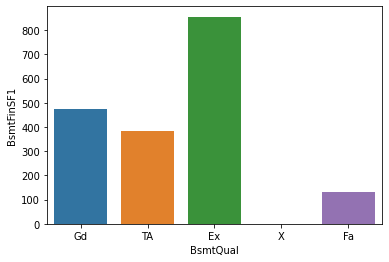

In [58]:
sb.barplot(x="BsmtQual", y="BsmtFinSF1", ci=None, data=train)

In [59]:
test["BsmtFinSF1"].fillna(train.groupby("BsmtQual")["BsmtFinSF1"].transform("mean").astype("int64"), inplace=True)

<AxesSubplot:xlabel='BsmtQual', ylabel='BsmtUnfSF'>

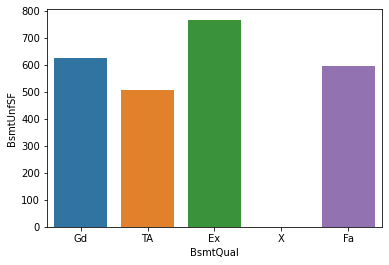

In [60]:
sb.barplot(x='BsmtQual', y='BsmtUnfSF', ci=None, data=train)

In [61]:
test["BsmtUnfSF"].fillna(train.groupby("BsmtQual")["BsmtUnfSF"].transform("mean"), inplace=True)

<AxesSubplot:xlabel='BsmtQual', ylabel='TotalBsmtSF'>

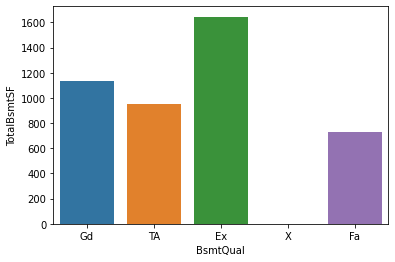

In [62]:
sb.barplot(x="BsmtQual", y="TotalBsmtSF", ci=None, data=train)

In [63]:
test["TotalBsmtSF"].fillna(train.groupby("BsmtQual")["TotalBsmtSF"].transform("mean"), inplace=True)

<AxesSubplot:xlabel='BsmtQual', ylabel='BsmtFullBath'>

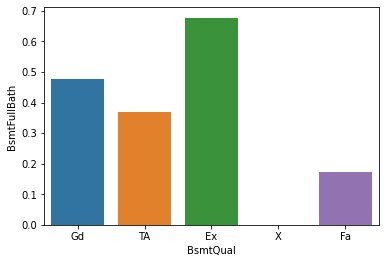

In [64]:
sb.barplot(x="BsmtQual", y="BsmtFullBath", ci=None, data=train)

In [65]:
test[test["BsmtFullBath"].isnull()].index.tolist()

[660, 728]

In [66]:
print(test["BsmtQual"][660])
print(test["BsmtQual"][728])

X
X


In [67]:
test['BsmtFullBath'][660] = 0
test["BsmtFullBath"][728] = 0

In [68]:
train["Electrical"].fillna(train["Electrical"].mode()[0], inplace=True)

In [69]:
gt_tr = train[train["GarageType"].isnull()].index.tolist()
gy_tr = train[train["GarageYrBlt"].isnull()].index.tolist()
gf_tr = train[train["GarageFinish"].isnull()].index.tolist()
gq_tr = train[train["GarageQual"].isnull()].index.tolist()
gc_tr = train[train["GarageCond"].isnull()].index.tolist()

print(gt_tr)
print(gy_tr)
print(gf_tr)
print(gq_tr)
print(gc_tr)

[39, 48, 78, 88, 89, 99, 108, 125, 127, 140, 148, 155, 163, 165, 198, 210, 241, 250, 287, 291, 307, 375, 386, 393, 431, 434, 441, 464, 495, 520, 528, 533, 535, 562, 582, 613, 614, 620, 635, 636, 638, 649, 705, 710, 738, 750, 784, 826, 843, 921, 942, 954, 960, 968, 970, 976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173, 1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349, 1407, 1449, 1450, 1453]
[39, 48, 78, 88, 89, 99, 108, 125, 127, 140, 148, 155, 163, 165, 198, 210, 241, 250, 287, 291, 307, 375, 386, 393, 431, 434, 441, 464, 495, 520, 528, 533, 535, 562, 582, 613, 614, 620, 635, 636, 638, 649, 705, 710, 738, 750, 784, 826, 843, 921, 942, 954, 960, 968, 970, 976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173, 1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349, 1407, 1449, 1450, 1453]
[39, 48, 78, 88, 89, 99, 108, 125, 127, 140, 148, 155, 163, 165, 198, 210, 241, 250, 287, 291, 307, 375, 386, 393, 431, 434, 441, 464, 495, 520, 528, 

In [70]:
gt_tr_null = []
for t in gt_tr:
    if t not in gy_tr or t not in gf_tr or t not in gq_tr or t not in gc_tr:
        gt_tr_null.append(t)

gy_tr_null = []
for y in gy_tr:
    if y not in gy_tr or y not in gf_tr or y not in gq_tr or y not in gc_tr:
        gy_tr_null.append(y)

gf_tr_null = []
for f in gf_tr:
    if f not in gt_tr or f not in gy_tr or f not in gq_tr or f not in gc_tr:
        gf_tr_null.append(f)

gq_tr_null = []
for q in gq_tr:
    if q not in gt_tr or q not in gy_tr or q not in gf_tr or q not in gc_tr:
        gq_tr_null.append(q)

gc_tr_null = []
for c in gc_tr:
    if c not in gt_tr or c not in gy_tr or c not in gf_tr or c not in gq_tr:
        gc_tr_null.append(c)

print(gt_tr_null)
print(gy_tr_null)
print(gf_tr_null)
print(gq_tr_null)
print(gc_tr_null)

[]
[]
[]
[]
[]


In [71]:
ty = test[test["GarageType"].isnull()].index.tolist()
blt = test[test["GarageYrBlt"].isnull()].index.tolist()
fi = test[test["GarageFinish"].isnull()].index.tolist()
car = test[test["GarageCars"].isnull()].index.tolist()
area = test[test["GarageArea"].isnull()].index.tolist()
qual = test[test["GarageQual"].isnull()].index.tolist()
cond = test[test["GarageCond"].isnull()].index.tolist()

print(ty)
print(blt)
print(fi)
print(car)
print(area)
print(qual)
print(cond)

[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 675, 691, 693, 729, 730, 731, 732, 733, 752, 778, 786, 893, 894, 938, 939, 962, 966, 1092, 1093, 1097, 1115, 1119, 1143, 1149, 1231, 1233, 1248, 1307, 1311, 1329, 1331, 1339, 1399, 1402, 1410, 1428, 1431, 1432, 1433, 1449, 1453, 1454, 1457]
[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 666, 675, 691, 693, 729, 730, 731, 732, 733, 752, 778, 786, 893, 894, 938, 939, 962, 966, 1092, 1093, 1097, 1115, 1116, 1119, 1143, 1149, 1231, 1233, 1248, 1307, 1311, 1329, 1331, 1339, 1399, 1402, 1410, 1428, 1431, 1432, 1433, 1449, 1453, 1454, 1457]
[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 666, 675, 691, 693, 729, 73

In [72]:
ty_fix = []
for t in ty:
    if t not in blt or t not in fi or t not in qual or t not in cond:
        ty_fix.append(t)

blt_fix = []
for b in blt:
    if b not in ty or b not in fi or b not in qual or b not in cond:
        blt_fix.append(b)

fi_fix = []
for f in fi:
    if f not in ty or f not in blt or f not in qual or f not in cond:
        fi_fix.append(f)

qual_fix = []
for q in qual:
    if q not in ty or q not in blt or q not in fi or q not in cond:
        qual_fix.append(q)

cond_fix = []
for c in cond:
    if c not in ty or c not in blt or c not in fi or c not in qual:
        cond_fix.append(c)

print(ty_fix)
print(blt_fix)
print(fi_fix)
print(qual_fix)
print(cond_fix)

[]
[666, 1116]
[666, 1116]
[666, 1116]
[666, 1116]


In [73]:
print(test["GarageType"][666])
print(test["GarageType"][1116])

Detchd
Detchd


In [74]:
train["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [75]:
test["GarageYrBlt"][666] = train[train["GarageType"] == 'Detchd']["GarageYrBlt"].mean().astype("int64")
test["GarageYrBlt"][1116] = train[train["GarageType"] == 'Detchd']["GarageYrBlt"].mean().astype("int64")
test["GarageFinish"][666] = train[train["GarageType"] == 'Detchd']["GarageFinish"].mode()[0]
test["GarageFinish"][1116] = train[train["GarageType"] == 'Detchd']["GarageFinish"].mode()[0]
test["GarageCars"][1116] = train[train["GarageType"] == 'Detchd']["GarageCars"].mode()[0]
test["GarageArea"][1116] = train[train["GarageType"] == 'Detchd']["GarageArea"].mean().astype("int64")
test["GarageQual"][666] = train[train["GarageType"] == 'Detchd']["GarageQual"].mode()[0]
test["GarageQual"][1116] = train[train["GarageType"] == 'Detchd']["GarageQual"].mode()[0]
test["GarageCond"][666] = train[train["GarageType"] == 'Detchd']["GarageCond"].mode()[0]
test["GarageCond"][1116] = train[train["GarageType"] == 'Detchd']["GarageCond"].mode()[0]

In [76]:
ty = test[test["GarageType"].isnull()].index.tolist()
blt = test[test["GarageYrBlt"].isnull()].index.tolist()
fi = test[test["GarageFinish"].isnull()].index.tolist()
car = test[test["GarageCars"].isnull()].index.tolist()
area = test[test["GarageArea"].isnull()].index.tolist()
qual = test[test["GarageQual"].isnull()].index.tolist()
cond = test[test["GarageCond"].isnull()].index.tolist()

print(ty)
print(blt)
print(fi)
print(car)
print(area)
print(qual)
print(cond)

[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 675, 691, 693, 729, 730, 731, 732, 733, 752, 778, 786, 893, 894, 938, 939, 962, 966, 1092, 1093, 1097, 1115, 1119, 1143, 1149, 1231, 1233, 1248, 1307, 1311, 1329, 1331, 1339, 1399, 1402, 1410, 1428, 1431, 1432, 1433, 1449, 1453, 1454, 1457]
[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 675, 691, 693, 729, 730, 731, 732, 733, 752, 778, 786, 893, 894, 938, 939, 962, 966, 1092, 1093, 1097, 1115, 1119, 1143, 1149, 1231, 1233, 1248, 1307, 1311, 1329, 1331, 1339, 1399, 1402, 1410, 1428, 1431, 1432, 1433, 1449, 1453, 1454, 1457]
[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 675, 691, 693, 729, 730, 731, 732, 733

In [77]:
ty_fix = []
for t in ty:
    if t not in blt or t not in fi or t not in qual or t not in cond:
        ty_fix.append(t)

blt_fix = []
for b in blt:
    if b not in ty or b not in fi or b not in qual or b not in cond:
        blt_fix.append(b)

fi_fix = []
for f in fi:
    if f not in ty or f not in blt or f not in qual or f not in cond:
        fi_fix.append(f)

qual_fix = []
for q in qual:
    if q not in ty or q not in blt or q not in fi or q not in cond:
        qual_fix.append(q)

cond_fix = []
for c in cond:
    if c not in ty or c not in blt or c not in fi or c not in qual:
        cond_fix.append(c)

print(ty_fix)
print(blt_fix)
print(fi_fix)
print(qual_fix)
print(cond_fix)

[]
[]
[]
[]
[]


In [78]:
train["GarageType"].fillna("X", inplace=True)
train["GarageYrBlt"].fillna(0, inplace=True)
train["GarageFinish"].fillna("X", inplace=True)
train["GarageQual"].fillna("X", inplace=True)
train["GarageCond"].fillna("X", inplace=True)

test["GarageType"].fillna("X", inplace=True)
test["GarageYrBlt"].fillna(0, inplace=True)
test["GarageFinish"].fillna("X", inplace=True)
test["GarageQual"].fillna("X", inplace=True)
test["GarageCond"].fillna("X", inplace=True)

In [79]:
test["MSZoning"].fillna(train["MSZoning"].mode()[0], inplace=True)
test["Utilities"].fillna(train["Utilities"].mode()[0], inplace=True)
test["Exterior1st"].fillna(train["Exterior1st"].mode()[0], inplace=True)
test["Exterior2nd"].fillna(train["Exterior2nd"].mode()[0], inplace=True)
test["KitchenQual"].fillna(train["KitchenQual"].mode()[0], inplace=True)
test["Functional"].fillna(train["Functional"].mode()[0], inplace=True)
test["SaleType"].fillna(train["SaleType"].mode()[0], inplace=True)

In [80]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [81]:
test.columns[test.isnull().any()]

Index([], dtype='object')

### 3.3 Etc.

* Float to int

In [82]:
float_train = train.columns[train.dtypes == 'float64'].tolist()
for f in float_train:
    train[f] = train[f].astype("int64")

In [83]:
float_test = test.columns[test.dtypes == 'float64'].tolist()
for f in float_test:
    test[f] = test[f].astype("int64")

* Object to int label

In [84]:
ob = train.columns[train.dtypes == 'object'].tolist()
for o in ob:
    label = preprocessing.LabelEncoder()
    label.fit(train[o])
    train[o] = label.transform(train[o])
    test[o] = label.transform(test[o])

* Skew

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

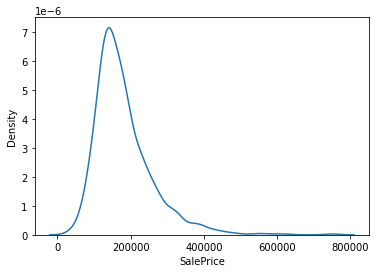

In [85]:
sb.kdeplot(train["SalePrice"])

In [86]:
train["SalePrice"] = np.log1p(train["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

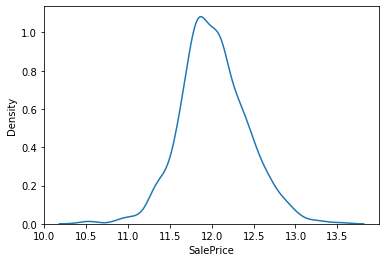

In [87]:
sb.kdeplot(train["SalePrice"])

<AxesSubplot:>

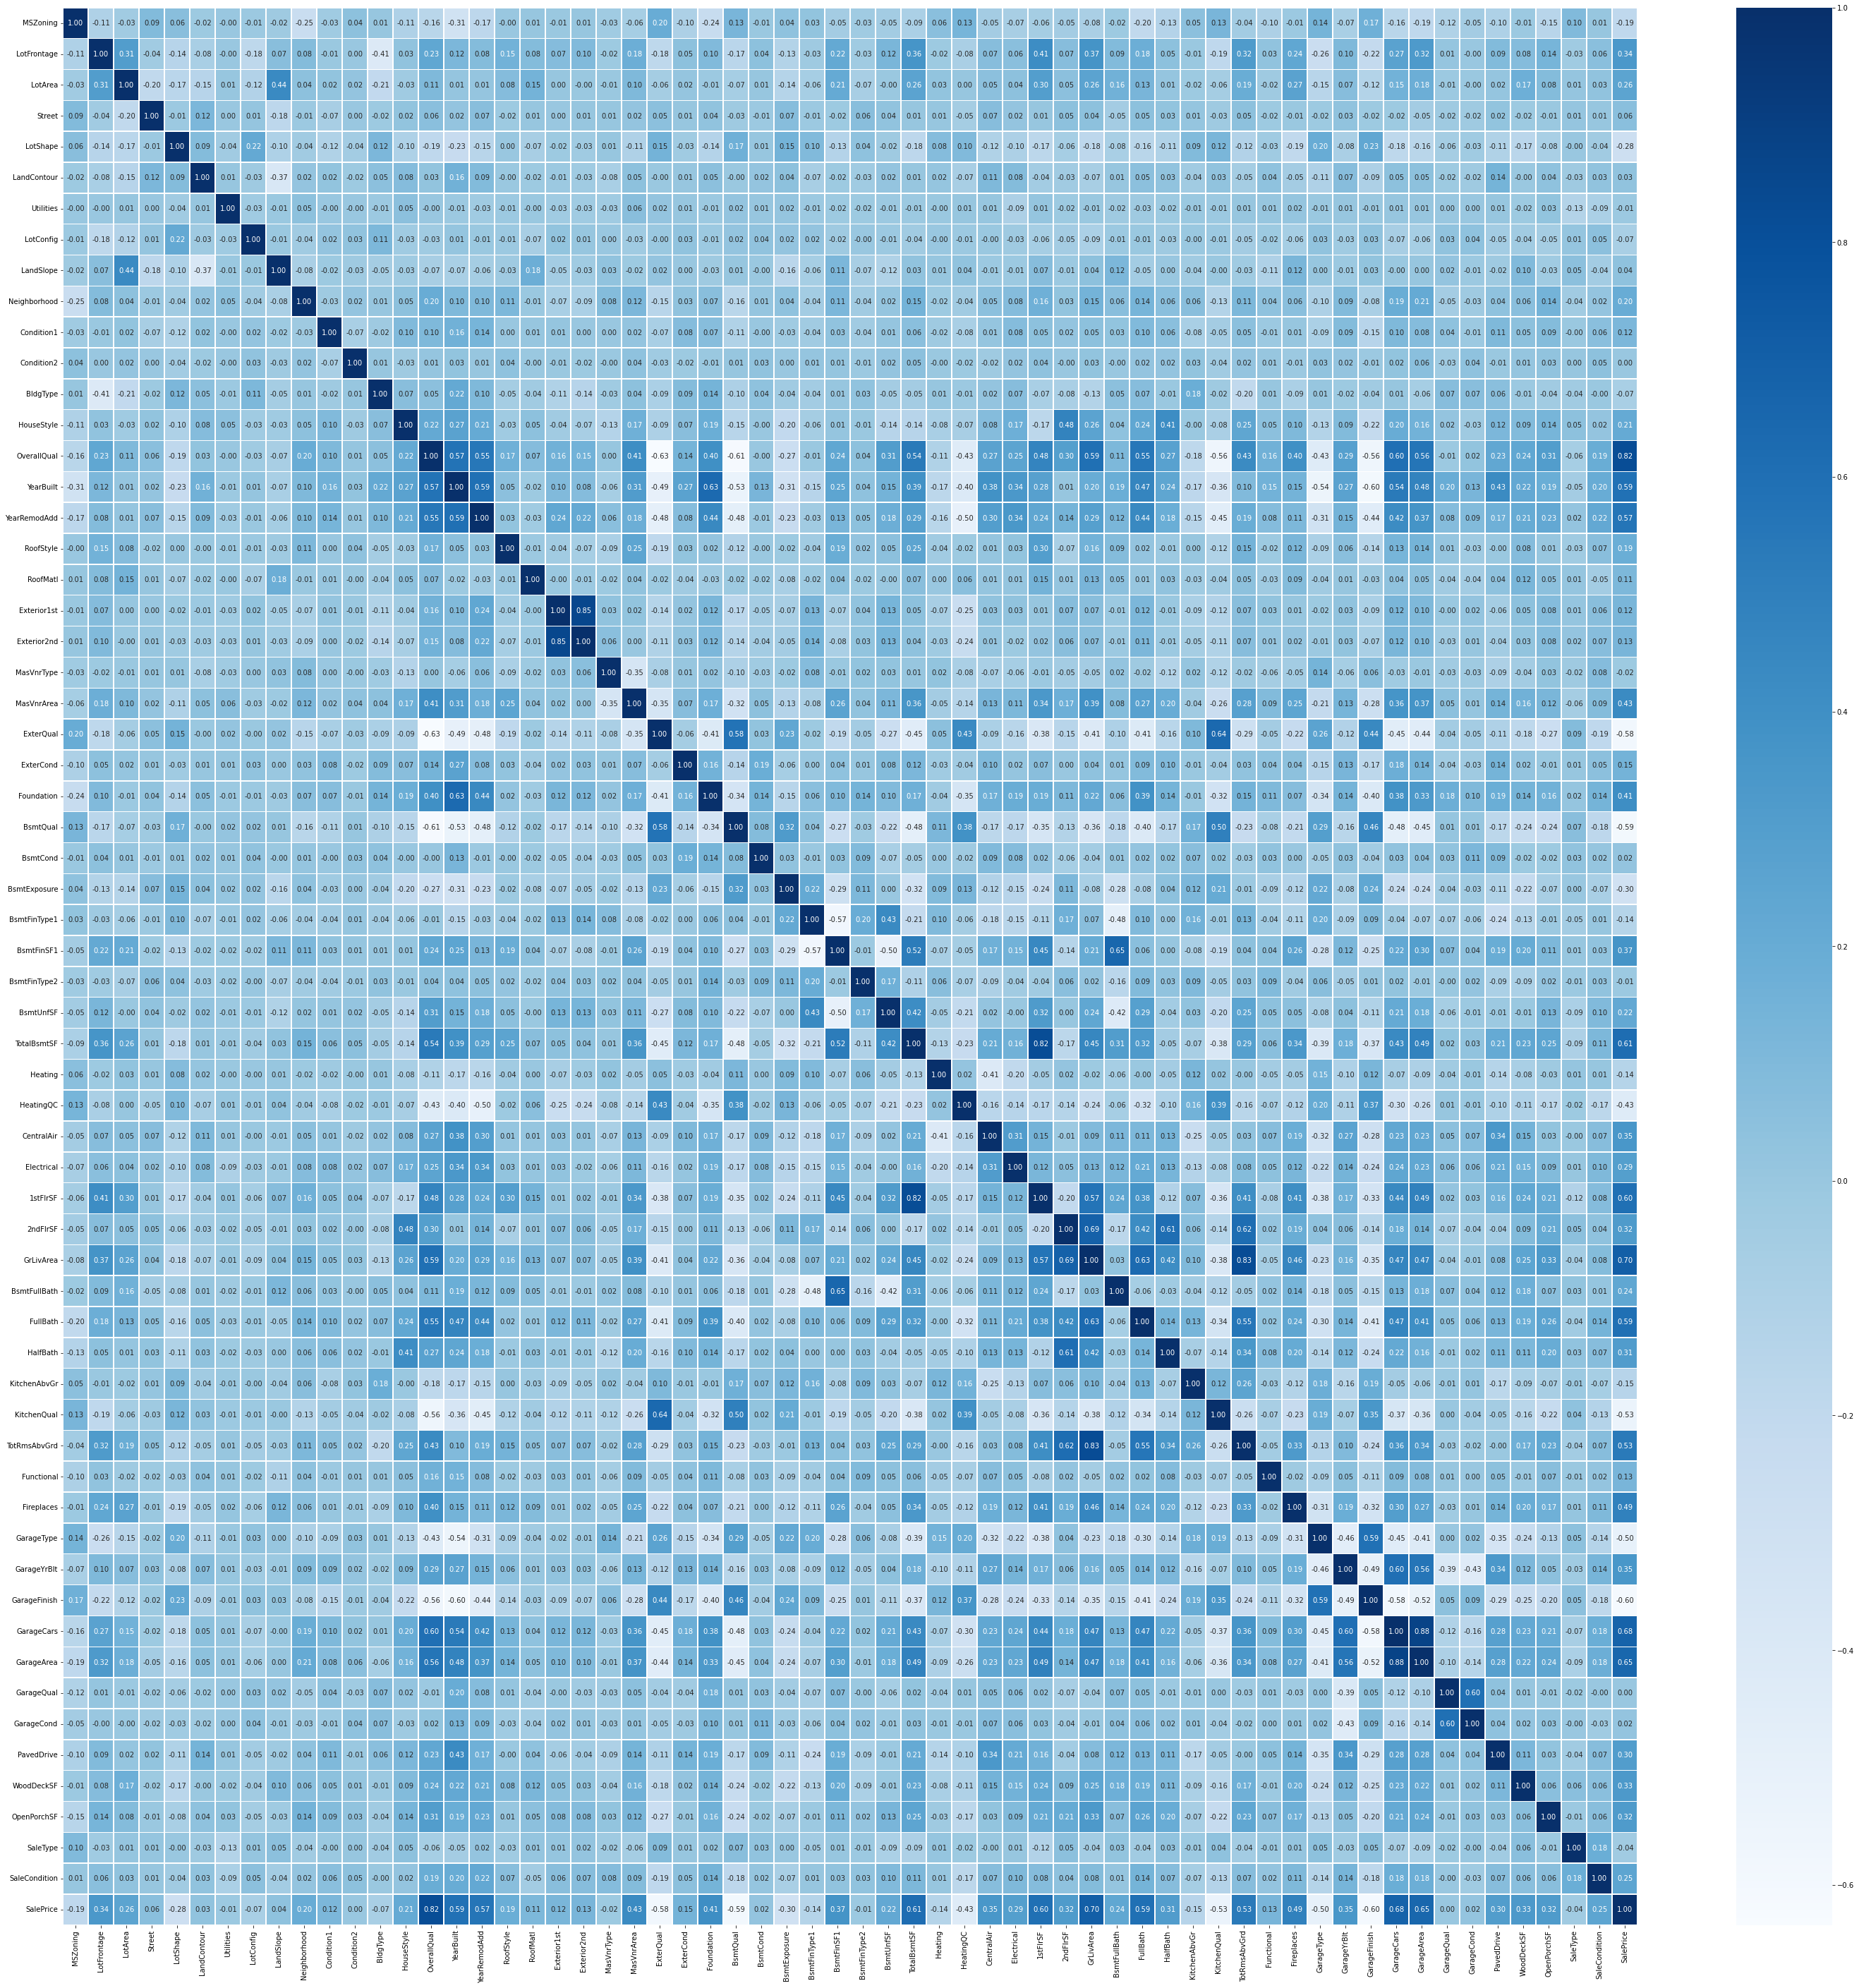

In [88]:
plt.figure(figsize=(50,50))
sb.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [89]:
corr = ["MSZoning", "LotArea", "Street", "LotShape", "LandContour", "Utilities", 
"LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType",
"HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType",
"ExterCond", "BsmtCond", "BsmtFinType1", "BsmtFinType2", "BsmtUnfSF",
"Heating", "CentralAir", "Electrical", "BsmtFullBath", "HalfBath", "KitchenAbvGr",
"Functional", "GarageYrBlt", "GarageQual", "GarageCond", "PavedDrive", "SaleType",
"SaleCondition"]

train = train.drop(corr, axis=1)
test = test.drop(corr, axis=1)

<AxesSubplot:>

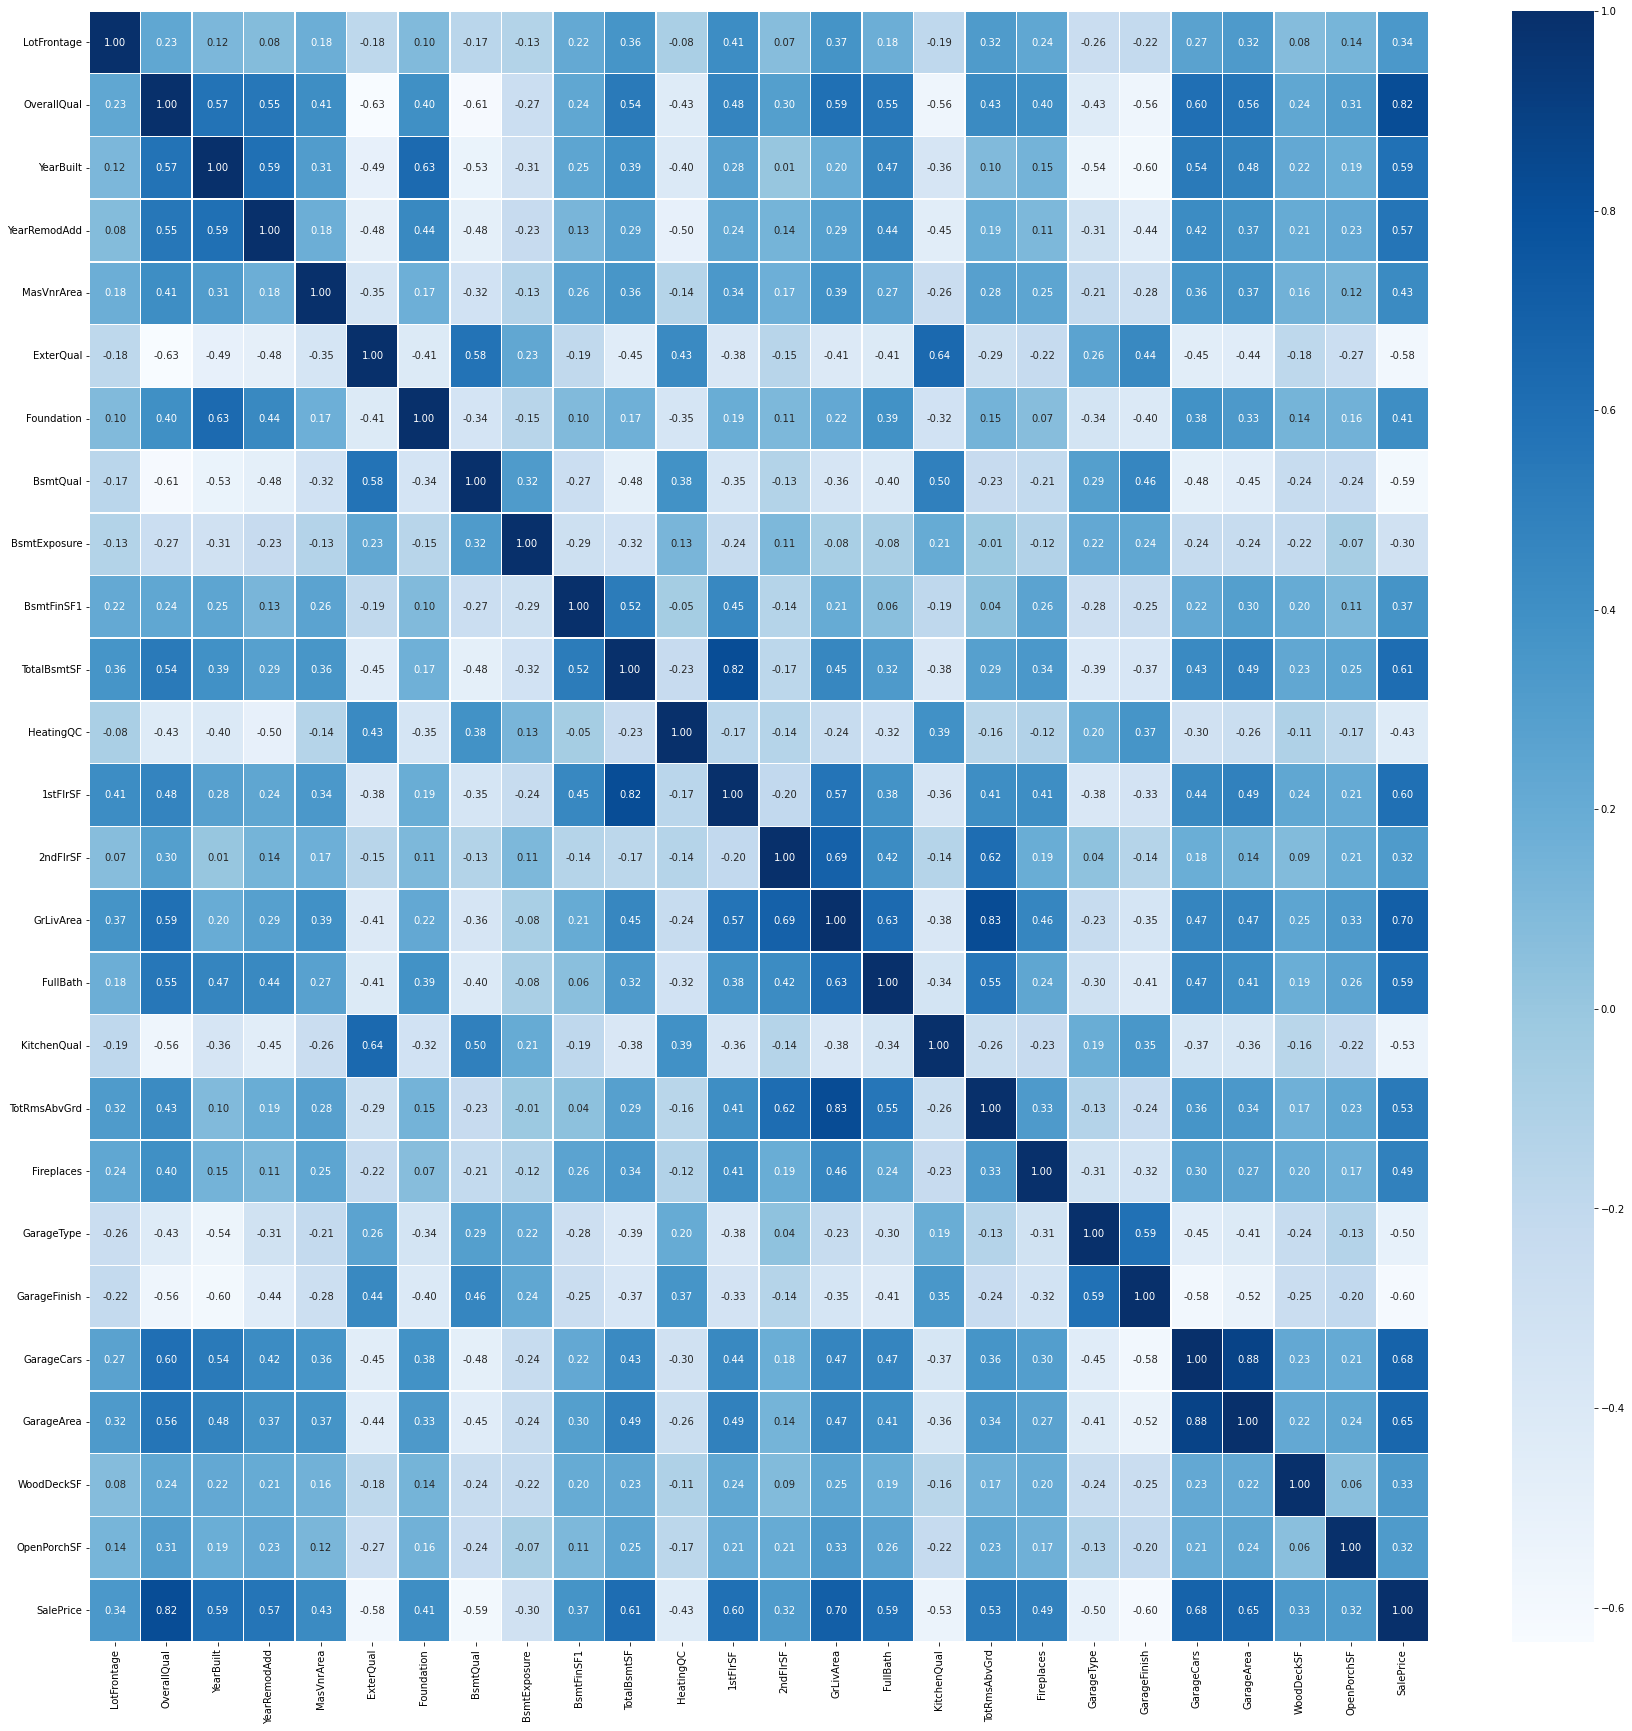

In [90]:
plt.figure(figsize=(30,30))
sb.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

## 4. Prediction

In [91]:
from pycaret import regression
from pycaret.regression import create_model, tune_model, finalize_model, predict_model

In [92]:
auto_ml = regression.setup(data=train, target="SalePrice", train_size=0.8)

,Description,Value
0,session_id,3044
1,Target,SalePrice
2,Original Data,"(1460, 26)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1168, 83)"


In [93]:
auto_ml_result = regression.compare_models(sort="RMSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0996,0.0211,0.1439,0.8620,0.0112,0.0084,2.2230
gbr,Gradient Boosting Regressor,0.1026,0.0225,0.1478,0.8532,0.0115,0.0086,0.1800
lightgbm,Light Gradient Boosting Machine,0.1051,0.0232,0.1508,0.8484,0.0117,0.0088,0.0840
rf,Random Forest Regressor,0.1058,0.0244,0.1548,0.8406,0.0120,0.0089,0.6150
br,Bayesian Ridge,0.1075,0.0292,0.1617,0.8152,0.0124,0.0090,0.0130
ridge,Ridge Regression,0.1086,0.0290,0.1624,0.8158,0.0125,0.0091,0.0150
lr,Linear Regression,0.1104,0.0305,0.1677,0.8065,0.0130,0.0093,0.3040
et,Extra Trees Regressor,0.1183,0.0307,0.1739,0.7994,0.0135,0.0099,0.5080
omp,Orthogonal Matching Pursuit,0.1263,0.0387,0.1878,0.7533,0.0143,0.0106,0.0140
en,Elastic Net,0.1216,0.0404,0.1899,0.7451,0.0145,0.0102,0.0120


In [94]:
catboost = create_model('catboost', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.099,0.0227,0.1507,0.8736,0.0115,0.0083


In [95]:
tune_cat = tune_model(catboost, optimize="RMSE", n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1116,0.0280,0.1674,0.7921,0.0133,0.0094
1,0.0922,0.0182,0.1349,0.8840,0.0107,0.0077
2,0.1084,0.0214,0.1463,0.8730,0.0113,0.0091
3,0.1149,0.0360,0.1898,0.7998,0.0148,0.0097
4,0.0937,0.0178,0.1335,0.8758,0.0103,0.0078
5,0.0857,0.0156,0.1248,0.8862,0.0097,0.0072
6,0.0883,0.0127,0.1128,0.9204,0.0087,0.0074
7,0.1126,0.0230,0.1515,0.8755,0.0118,0.0095
8,0.1045,0.0223,0.1492,0.8429,0.0114,0.0087


In [96]:
fin_model = finalize_model(tune_cat)
pred = predict_model(fin_model, data=test)

## 5. Submission

In [97]:
result_pre = pd.read_csv("./dataset/test.csv")

In [98]:
result = pd.DataFrame({"Id": result_pre["Id"], "SalePrice": np.expm1(pred["Label"])})

In [99]:
result.to_csv("submission.csv", index=False)